In [38]:
import pandas as pd 
import matplotlib as plt
import seaborn as sns
import prepare

In [2]:
df = pd.read_json("default-cards-20220727090443.json")

In [3]:
df = prepare.prepare_dataframe(df)

In [4]:
df['standard'] = df.legalities.apply(lambda r : r['standard'])

In [5]:
train, validate, test = prepare.split_data(df)

In [6]:
train

,id,name,lang,released_at,layout,highres_image,image_status,mana_cost,cmc,type_line,...,content_warning,flavor_name,usd,usd_foil,eur,eur_foil,is_foil,is_etched,is_glossy,standard
12661,2d911053-a026-4b20-ba2d-dbcc367c1413,Ajani Goldmane,en,2010-07-16,normal,True,highres_scan,{2}{W}{W},4.0,Legendary Planeswalker — Ajani,...,False,no_flavor,8.02,15.11,8.02,15.11,True,False,False,not_legal
61300,dcb2e0d6-3181-4d3d-a3b4-3896288b2e0e,Champion of Lambholt,en,2020-08-07,normal,True,highres_scan,{1}{G}{G},3.0,Creature — Human Warrior,...,False,no_flavor,0.36,3.23,0.36,3.23,True,False,False,not_legal
48604,af3aa149-00fa-4932-b004-f64c8b5d3ca7,Gargoyle,en,2009-07-17,token,True,highres_scan,,0.0,Token Artifact Creature — Gargoyle,...,False,no_flavor,0.25,0.00,0.25,0.00,False,False,False,not_legal
55734,c8d75604-4941-4faf-8f1a-7fc529e64962,Goblin Settler,en,2022-04-12,normal,True,highres_scan,{3}{R},4.0,Creature — Goblin,...,False,no_flavor,9.76,11.87,9.76,11.87,True,False,False,not_legal
70638,feef03a1-f19a-413b-ad86-0b357cf9c09c,Weight Advantage,en,2016-08-26,normal,True,highres_scan,,0.0,Conspiracy,...,False,no_flavor,0.11,0.42,0.11,0.42,True,False,False,not_legal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8507,1e81e5fc-0e18-4dd8-a505-aa7dba8521a8,Kaboom!,en,2002-10-07,normal,True,highres_scan,{4}{R},5.0,Sorcery,...,False,no_flavor,0.24,7.36,0.24,7.36,True,False,False,not_legal
54821,c59e3dd0-9cd4-4c65-9296-e2020a0df857,"Vraska, Relic Seeker",en,2017-09-29,normal,True,highres_scan,{4}{B}{G},6.0,Legendary Planeswalker — Vraska,...,False,no_flavor,5.33,10.10,5.33,10.10,True,False,False,not_legal
66803,f0c02fd3-8051-4a35-b14a-462d765f42e5,Veteran Motorist,en,2020-11-12,normal,False,lowres,{R}{W},2.0,Creature — Dwarf Pilot,...,False,no_flavor,0.00,0.00,0.00,0.00,False,False,False,not_legal
68710,f7ae5085-0d0d-4d7d-80a3-614315a07de5,"Liliana, the Last Hope",en,2022-07-08,normal,False,lowres,{1}{B}{B},3.0,Legendary Planeswalker — Liliana,...,False,no_flavor,11.14,12.52,11.14,12.52,True,False,False,not_legal


<AxesSubplot:>

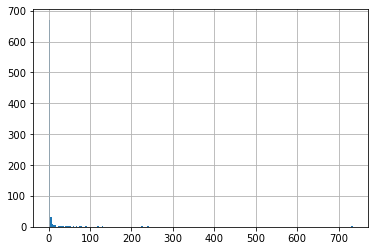

In [7]:
train.groupby("set_name")['usd'].mean().dropna().hist(bins=200)
#I am gonna chope off sets that go past 100 to make this more bearable

In [8]:
train.usd.describe()

count    53199.000000
mean         5.198298
std         93.589152
min          0.000000
25%          0.010000
50%          0.130000
75%          0.480000
max      11500.000000
Name: usd, dtype: float64

In [9]:
train.standard.value_counts()

not_legal    45983
legal         7201
banned          15
Name: standard, dtype: int64

In [10]:
df.standard.value_counts()

not_legal    61300
legal         9614
banned          18
Name: standard, dtype: int64

In [11]:
train.groupby(train.standard == "legal").mean()

,highres_image,cmc,reserved,foil,nonfoil,oversized,promo,reprint,variation,digital,...,life_modifier,hand_modifier,content_warning,usd,usd_foil,eur,eur_foil,is_foil,is_etched,is_glossy
standard,,,,,,,,,,,,,,,,,,,,,
False,0.902691,46.490586,0.022392,0.567046,0.909953,0.006913,0.092287,0.577569,0.001022,0.096330,...,0.001544,0.000043,0.000565,5.750572,5.213842,5.750572,5.213842,0.567046,0.010827,0.000087
True,0.842800,1.831273,0.000000,0.750868,0.878350,0.000000,0.214970,0.669074,0.000417,0.084433,...,0.000000,0.000000,0.000000,1.670522,3.113779,1.670522,3.113779,0.750868,0.006249,0.000000


standard
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: usd, dtype: object

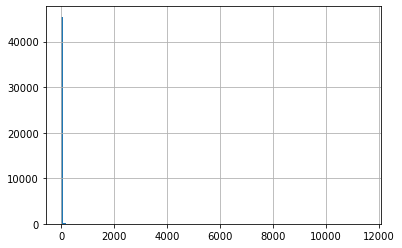

In [12]:
train.groupby(train.standard == "legal").usd.hist(bins=200)
#I see the problem I believe they are the only entries

Now that I have average prices I need some sort of categorical data to measure the price against to get <u>A</u> distribution

In [13]:
train.columns

Index(['id', 'name', 'lang', 'released_at', 'layout', 'highres_image',
       'image_status', 'mana_cost', 'cmc', 'type_line', 'oracle_text', 'power',
       'toughness', 'colors', 'color_identity', 'keywords', 'legalities',
       'games', 'reserved', 'foil', 'nonfoil', 'finishes', 'oversized',
       'promo', 'reprint', 'variation', 'set_id', 'set', 'set_name',
       'set_type', 'collector_number', 'digital', 'rarity', 'flavor_text',
       'artist', 'border_color', 'frame', 'full_art', 'textless', 'booster',
       'story_spotlight', 'edhrec_rank', 'penny_rank', 'prices', 'promo_types',
       'security_stamp', 'produced_mana', 'watermark', 'frame_effects',
       'loyalty', 'printed_name', 'color_indicator', 'life_modifier',
       'hand_modifier', 'content_warning', 'flavor_name', 'usd', 'usd_foil',
       'eur', 'eur_foil', 'is_foil', 'is_etched', 'is_glossy', 'standard'],
      dtype='object')

## This is where I am finding the price distribution of cards that are in standard rotation

In [14]:
train[train.standard == "legal"].usd

10408    0.10
42810    0.00
42687    0.30
47130    0.02
10585    0.28
         ... 
39027    0.00
38042    0.42
52515    0.00
59552    0.00
1677     0.13
Name: usd, Length: 7201, dtype: float64

In [15]:
train[train.standard == "legal"].usd.dropna()

10408    0.10
42810    0.00
42687    0.30
47130    0.02
10585    0.28
         ... 
39027    0.00
38042    0.42
52515    0.00
59552    0.00
1677     0.13
Name: usd, Length: 7201, dtype: float64

In [16]:
train[train.standard == "legal"].usd[train.usd == 0]

42810    0.0
44751    0.0
7570     0.0
18780    0.0
48689    0.0
        ... 
25606    0.0
5390     0.0
39027    0.0
52515    0.0
59552    0.0
Name: usd, Length: 1835, dtype: float64

In [17]:
train[train.standard == "legal"].usd_foil[train.usd_foil == 0]

7570     0.0
10724    0.0
4681     0.0
47716    0.0
18780    0.0
        ... 
25606    0.0
5390     0.0
39027    0.0
52515    0.0
59552    0.0
Name: usd_foil, Length: 2266, dtype: float64

In [18]:
train[train.standard == "legal"]

,id,name,lang,released_at,layout,highres_image,image_status,mana_cost,cmc,type_line,...,content_warning,flavor_name,usd,usd_foil,eur,eur_foil,is_foil,is_etched,is_glossy,standard
10408,25583bb7-9071-40ff-b4b3-d9587ccf91df,Screaming Swarm,en,2022-01-28,normal,False,lowres,{5}{U},6.0,Creature — Bird Horror,...,False,no_flavor,0.10,0.73,0.10,0.73,True,False,False,legal
42810,9aa1bfb1-071a-4e97-84cf-c2ae8f749ea9,Grand Master of Flowers,en,2021-07-23,normal,True,highres_scan,{2}{W}{W},4.0,Legendary Planeswalker — Bahamut,...,False,no_flavor,0.00,90.95,0.00,90.95,True,False,False,legal
42687,9a38509a-2b74-42a0-af91-ed453e463b95,Island,en,1999-10-04,normal,True,highres_scan,,0.0,Basic Land — Island,...,False,no_flavor,0.30,11.62,0.30,11.62,True,False,False,legal
47130,a9e6de80-3516-426b-8a1b-bda45f8c0cac,Thundering Sparkmage,en,2020-09-25,normal,True,highres_scan,{3}{R},4.0,Creature — Human Wizard,...,False,no_flavor,0.02,0.05,0.02,0.05,True,False,False,legal
10585,25f96283-0dab-49d3-a1b1-d77d07c172ae,Concealing Curtains // Revealing Eye,en,2021-11-19,transform,True,highres_scan,no_mana_cost,1.0,Creature — Wall // Creature — Eye Horror,...,False,no_flavor,0.28,0.41,0.28,0.41,True,False,False,legal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39027,8d30feea-b30d-4a6e-9357-f2148c9a8bcf,Mountain,en,1996-07-01,normal,True,highres_scan,,0.0,Basic Land — Mountain,...,False,no_flavor,0.00,0.00,0.00,0.00,False,False,False,legal
38042,89a698a5-f4ac-4b04-96dc-32e1eeef6ac7,Thousand-Faced Shadow,en,2022-02-18,normal,True,highres_scan,{U},1.0,Creature — Human Ninja,...,False,no_flavor,0.42,1.16,0.42,1.16,True,False,False,legal
52515,bd45e4e1-8459-412a-b021-88cdab8837c7,Snow-Covered Island,en,2021-08-01,normal,False,lowres,,0.0,Basic Snow Land — Island,...,False,no_flavor,0.00,0.00,0.00,0.00,False,False,False,legal
59552,d65e9625-a6c8-4a15-aac2-4a790f95d4b7,Mountain,es,2005-08-22,normal,True,highres_scan,,0.0,Basic Land — Mountain,...,False,no_flavor,0.00,0.00,0.00,0.00,False,False,False,legal


In [19]:
dropped = train

In [20]:
dropped[dropped.standard == "legal"].usd

10408    0.10
42810    0.00
42687    0.30
47130    0.02
10585    0.28
         ... 
39027    0.00
38042    0.42
52515    0.00
59552    0.00
1677     0.13
Name: usd, Length: 7201, dtype: float64

In [27]:
dropped

,id,name,lang,released_at,layout,highres_image,image_status,mana_cost,cmc,type_line,...,content_warning,flavor_name,usd,usd_foil,eur,eur_foil,is_foil,is_etched,is_glossy,standard
12661,2d911053-a026-4b20-ba2d-dbcc367c1413,Ajani Goldmane,en,2010-07-16,normal,True,highres_scan,{2}{W}{W},4.0,Legendary Planeswalker — Ajani,...,False,no_flavor,8.02,15.11,8.02,15.11,True,False,False,not_legal
61300,dcb2e0d6-3181-4d3d-a3b4-3896288b2e0e,Champion of Lambholt,en,2020-08-07,normal,True,highres_scan,{1}{G}{G},3.0,Creature — Human Warrior,...,False,no_flavor,0.36,3.23,0.36,3.23,True,False,False,not_legal
48604,af3aa149-00fa-4932-b004-f64c8b5d3ca7,Gargoyle,en,2009-07-17,token,True,highres_scan,,0.0,Token Artifact Creature — Gargoyle,...,False,no_flavor,0.25,0.00,0.25,0.00,False,False,False,not_legal
55734,c8d75604-4941-4faf-8f1a-7fc529e64962,Goblin Settler,en,2022-04-12,normal,True,highres_scan,{3}{R},4.0,Creature — Goblin,...,False,no_flavor,9.76,11.87,9.76,11.87,True,False,False,not_legal
70638,feef03a1-f19a-413b-ad86-0b357cf9c09c,Weight Advantage,en,2016-08-26,normal,True,highres_scan,,0.0,Conspiracy,...,False,no_flavor,0.11,0.42,0.11,0.42,True,False,False,not_legal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8507,1e81e5fc-0e18-4dd8-a505-aa7dba8521a8,Kaboom!,en,2002-10-07,normal,True,highres_scan,{4}{R},5.0,Sorcery,...,False,no_flavor,0.24,7.36,0.24,7.36,True,False,False,not_legal
54821,c59e3dd0-9cd4-4c65-9296-e2020a0df857,"Vraska, Relic Seeker",en,2017-09-29,normal,True,highres_scan,{4}{B}{G},6.0,Legendary Planeswalker — Vraska,...,False,no_flavor,5.33,10.10,5.33,10.10,True,False,False,not_legal
66803,f0c02fd3-8051-4a35-b14a-462d765f42e5,Veteran Motorist,en,2020-11-12,normal,False,lowres,{R}{W},2.0,Creature — Dwarf Pilot,...,False,no_flavor,0.00,0.00,0.00,0.00,False,False,False,not_legal
68710,f7ae5085-0d0d-4d7d-80a3-614315a07de5,"Liliana, the Last Hope",en,2022-07-08,normal,False,lowres,{1}{B}{B},3.0,Legendary Planeswalker — Liliana,...,False,no_flavor,11.14,12.52,11.14,12.52,True,False,False,not_legal


In [28]:
dropped.columns

Index(['id', 'name', 'lang', 'released_at', 'layout', 'highres_image',
       'image_status', 'mana_cost', 'cmc', 'type_line', 'oracle_text', 'power',
       'toughness', 'colors', 'color_identity', 'keywords', 'legalities',
       'games', 'reserved', 'foil', 'nonfoil', 'finishes', 'oversized',
       'promo', 'reprint', 'variation', 'set_id', 'set', 'set_name',
       'set_type', 'collector_number', 'digital', 'rarity', 'flavor_text',
       'artist', 'border_color', 'frame', 'full_art', 'textless', 'booster',
       'story_spotlight', 'edhrec_rank', 'penny_rank', 'prices', 'promo_types',
       'security_stamp', 'produced_mana', 'watermark', 'frame_effects',
       'loyalty', 'printed_name', 'color_indicator', 'life_modifier',
       'hand_modifier', 'content_warning', 'flavor_name', 'usd', 'usd_foil',
       'eur', 'eur_foil', 'is_foil', 'is_etched', 'is_glossy', 'standard'],
      dtype='object')

In [25]:
# dropped.groupby(dropped.standard == "legal")[dropped.usd != 0]

KeyError: 'Columns not found: False, True'

In [30]:
newdf = train[train.standard == "legal"][train.usd != 0]
newdf

/var/folders/cs/9mn89l_n6p3c9sq01q5f54kh0000gn/T/ipykernel_12424/3777474427.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  newdf = train[train.standard == "legal"][train.usd != 0]


,id,name,lang,released_at,layout,highres_image,image_status,mana_cost,cmc,type_line,...,content_warning,flavor_name,usd,usd_foil,eur,eur_foil,is_foil,is_etched,is_glossy,standard
10408,25583bb7-9071-40ff-b4b3-d9587ccf91df,Screaming Swarm,en,2022-01-28,normal,False,lowres,{5}{U},6.0,Creature — Bird Horror,...,False,no_flavor,0.10,0.73,0.10,0.73,True,False,False,legal
42687,9a38509a-2b74-42a0-af91-ed453e463b95,Island,en,1999-10-04,normal,True,highres_scan,,0.0,Basic Land — Island,...,False,no_flavor,0.30,11.62,0.30,11.62,True,False,False,legal
47130,a9e6de80-3516-426b-8a1b-bda45f8c0cac,Thundering Sparkmage,en,2020-09-25,normal,True,highres_scan,{3}{R},4.0,Creature — Human Wizard,...,False,no_flavor,0.02,0.05,0.02,0.05,True,False,False,legal
10585,25f96283-0dab-49d3-a1b1-d77d07c172ae,Concealing Curtains // Revealing Eye,en,2021-11-19,transform,True,highres_scan,no_mana_cost,1.0,Creature — Wall // Creature — Eye Horror,...,False,no_flavor,0.28,0.41,0.28,0.41,True,False,False,legal
55576,c84db1e2-855c-4169-a9cc-a54c73c14e0c,Oni-Cult Anvil,en,2022-02-18,normal,True,highres_scan,{B}{R},2.0,Artifact,...,False,no_flavor,0.16,0.49,0.16,0.49,True,False,False,legal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5211,1267a5fa-f9a9-4a7f-89f9-24889868ccff,Mountain,en,2003-07-28,normal,True,highres_scan,,0.0,Basic Land — Mountain,...,False,no_flavor,0.22,0.89,0.22,0.89,True,False,False,legal
18284,42044efb-b6a8-46c3-90dc-b7a745e819e5,Island,en,2018-07-13,normal,True,highres_scan,,0.0,Basic Land — Island,...,False,no_flavor,0.07,0.35,0.07,0.35,True,False,False,legal
32624,75e8d71c-3a0b-4042-a0f7-e99e92a79dc2,Shrine Steward,en,2022-02-18,normal,True,highres_scan,{5},5.0,Artifact Creature — Construct,...,False,no_flavor,0.04,0.10,0.04,0.10,True,False,False,legal
38042,89a698a5-f4ac-4b04-96dc-32e1eeef6ac7,Thousand-Faced Shadow,en,2022-02-18,normal,True,highres_scan,{U},1.0,Creature — Human Ninja,...,False,no_flavor,0.42,1.16,0.42,1.16,True,False,False,legal


<AxesSubplot:>

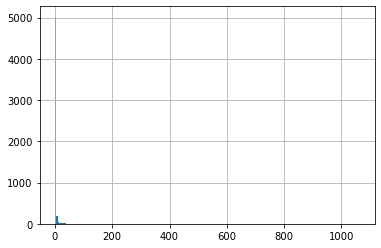

In [34]:
newdf.usd.hist(bins=200)
#why is this acting up not as expected
#the max value is way over blown and not in fact reflective of price

In [37]:
newdf.usd.max()

1062.47

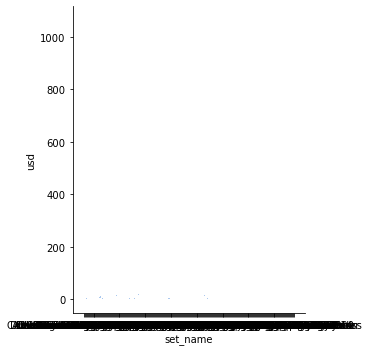

In [39]:
sns.displot(data=newdf, y='usd', x="set_name")

In [40]:
curset = newdf[newdf.standard == 'legal']
curset

,id,name,lang,released_at,layout,highres_image,image_status,mana_cost,cmc,type_line,...,content_warning,flavor_name,usd,usd_foil,eur,eur_foil,is_foil,is_etched,is_glossy,standard
10408,25583bb7-9071-40ff-b4b3-d9587ccf91df,Screaming Swarm,en,2022-01-28,normal,False,lowres,{5}{U},6.0,Creature — Bird Horror,...,False,no_flavor,0.10,0.73,0.10,0.73,True,False,False,legal
42687,9a38509a-2b74-42a0-af91-ed453e463b95,Island,en,1999-10-04,normal,True,highres_scan,,0.0,Basic Land — Island,...,False,no_flavor,0.30,11.62,0.30,11.62,True,False,False,legal
47130,a9e6de80-3516-426b-8a1b-bda45f8c0cac,Thundering Sparkmage,en,2020-09-25,normal,True,highres_scan,{3}{R},4.0,Creature — Human Wizard,...,False,no_flavor,0.02,0.05,0.02,0.05,True,False,False,legal
10585,25f96283-0dab-49d3-a1b1-d77d07c172ae,Concealing Curtains // Revealing Eye,en,2021-11-19,transform,True,highres_scan,no_mana_cost,1.0,Creature — Wall // Creature — Eye Horror,...,False,no_flavor,0.28,0.41,0.28,0.41,True,False,False,legal
55576,c84db1e2-855c-4169-a9cc-a54c73c14e0c,Oni-Cult Anvil,en,2022-02-18,normal,True,highres_scan,{B}{R},2.0,Artifact,...,False,no_flavor,0.16,0.49,0.16,0.49,True,False,False,legal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5211,1267a5fa-f9a9-4a7f-89f9-24889868ccff,Mountain,en,2003-07-28,normal,True,highres_scan,,0.0,Basic Land — Mountain,...,False,no_flavor,0.22,0.89,0.22,0.89,True,False,False,legal
18284,42044efb-b6a8-46c3-90dc-b7a745e819e5,Island,en,2018-07-13,normal,True,highres_scan,,0.0,Basic Land — Island,...,False,no_flavor,0.07,0.35,0.07,0.35,True,False,False,legal
32624,75e8d71c-3a0b-4042-a0f7-e99e92a79dc2,Shrine Steward,en,2022-02-18,normal,True,highres_scan,{5},5.0,Artifact Creature — Construct,...,False,no_flavor,0.04,0.10,0.04,0.10,True,False,False,legal
38042,89a698a5-f4ac-4b04-96dc-32e1eeef6ac7,Thousand-Faced Shadow,en,2022-02-18,normal,True,highres_scan,{U},1.0,Creature — Human Ninja,...,False,no_flavor,0.42,1.16,0.42,1.16,True,False,False,legal


In [45]:
curset.set_name.value_counts().head(15)

Innistrad: Double Feature                      400
Kamigawa: Neon Dynasty                         357
Innistrad: Crimson Vow                         311
Kaldheim                                       304
Innistrad: Midnight Hunt                       297
Streets of New Capenna                         291
Adventures in the Forgotten Realms             285
Zendikar Rising                                284
Strixhaven: School of Mages                    279
Adventures in the Forgotten Realms Promos       63
Streets of New Capenna Promos                   60
Innistrad: Midnight Hunt Promos                 55
Strixhaven: School of Mages Promos              54
Kaldheim Promos                                 53
Commander Legends: Battle for Baldur's Gate     47
Name: set_name, dtype: int64

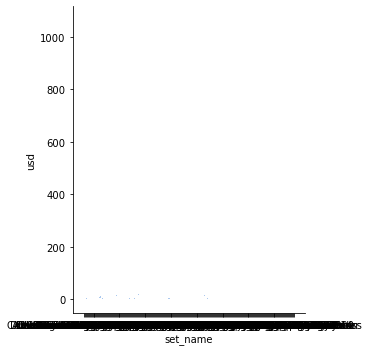

In [41]:
sns.displot(data=curset, y='usd', x="set_name")

In [50]:
standard = ['Zendikar Rising','Kaldheim','Strixhaven: School of Mages','Dungeons & Dragons: Adventures in the Forgotten Realms']

In [53]:
curset.loc[curset['set_name'] == ['Zendikar Rising','Kaldheim','Strixhaven: School of Mages','Dungeons & Dragons: Adventures in the Forgotten Realms']]

ValueError: ('Lengths must match to compare', (5366,), (4,))